# CONNECTING MYSQL AND PYTHON FOR DATA VISUALIZATION

### This project used a dataset located on MYSQL database server. 
#### Using mysql.connector I connected two (2) tables from my cte_example database to Jupyter Notebook.
#### The tables were converted to DataFrames. Data Wrangling using Pandas and Data Visualization was also done using Seaborn and Matplotlib.


In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Importing all necessary packages for Data Wrangling and Data Visualization

In [204]:
!pip install mysql-connector-python

#Installing mysql-connectr-python library, which was used for Mysql server and Python connection

In [55]:
import mysql.connector

#Importing mysql.connector package

In [56]:
connection = mysql.connector.connect(
    host = 'localhost',
    user = 'root',
    password = 'FUTMINNA2019',
    autocommit = True
)

#Creating a connection to mysql server

In [57]:
cursor = connection.cursor()
cursor.execute('show databases')
result = cursor.fetchall()
cursor.close()
result

#Query to show all databases before selecting the desired database where the tables reside

[('auto',),
 ('country',),
 ('cte_example',),
 ('example',),
 ('gbenga',),
 ('information_schema',),
 ('mysql',),
 ('performance_schema',),
 ('states',),
 ('sys',)]

In [58]:
cursor = connection.cursor()
cursor.execute('use cte_example')

#Uisng the cte_example Database

In [60]:
cursor.close()
cursor = connection.cursor()
cursor.execute('show tables')
result = cursor.fetchall()
cursor.close()
result
#Query to show all tables in the cte_example database

[('employees',), ('products',), ('sales',), ('sales_team',)]

In [95]:
cursor = connection.cursor()
query = 'select * from products'
cursor.execute(query)
df = pd.DataFrame(cursor.fetchall(), columns = ['product_id', 'product_name', 'category'])
cursor.close()
df
#Transforming the table into a DataFrame

,product_id,product_name,category
0,101,Laptop,Electronics
1,102,Smartphone,Electronics
2,103,Office Chair,Furniture
3,104,Desk Lamp,Furniture
4,105,Coffee Machine,Appliances
5,106,Blender,Appliances
6,107,Air Conditioner,Appliances


In [98]:
cursor = connection.cursor()
query = 'select * from sales'
cursor.execute(query)
df1 = pd.DataFrame(cursor.fetchall(), columns = ['sales_id', 'sales_date', 'product_id','quantity_sold', 'sales_amount'])
cursor.close()
df1
#Transforming the second table into a database

,sales_id,sales_date,product_id,quantity_sold,sales_amount
0,1,2024-08-01,101,5,500
1,2,2024-08-02,102,3,300
2,3,2024-08-02,103,7,700
3,4,2024-08-03,101,2,200
4,5,2024-08-03,104,1,100
5,6,2024-08-04,105,10,1000
6,7,2024-08-05,102,6,600
7,8,2024-08-05,106,4,400
8,9,2024-08-06,107,8,800
9,10,2024-08-07,103,3,300


In [99]:
new_df = df.merge(df1, on = 'product_id', how = 'inner')

#Joining both DataFrames together 

In [148]:
new_df

,product_id,product_name,category,sales_id,sales_date,quantity_sold,sales_amount
0,101,Laptop,Electronics,1,2024-08-01,5,500
1,101,Laptop,Electronics,4,2024-08-03,2,200
2,102,Smartphone,Electronics,2,2024-08-02,3,300
3,102,Smartphone,Electronics,7,2024-08-05,6,600
4,103,Office Chair,Furniture,3,2024-08-02,7,700
5,103,Office Chair,Furniture,10,2024-08-07,3,300
6,104,Desk Lamp,Furniture,5,2024-08-03,1,100
7,105,Coffee Machine,Appliances,6,2024-08-04,10,1000
8,106,Blender,Appliances,8,2024-08-05,4,400
9,107,Air Conditioner,Appliances,9,2024-08-06,8,800


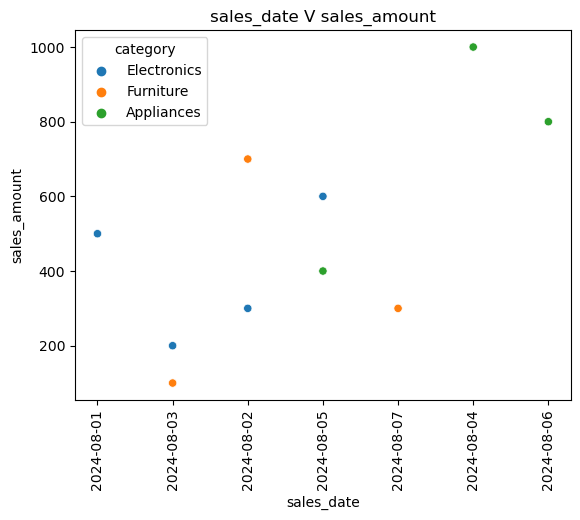

In [206]:
sns.scatterplot(x = 'sales_date', y ='sales_amount', data = new_df, hue = 'category')
plt.xticks(rotation = 90)
plt.title('sales_date V sales_amount')
plt.show()

#A seaborn scatterplot to show relationship between Sales date and Sales Amount


### From the scatterplot we can deduce that the highest sale was recorded on 2024-08-04 and we also see that more Electronics were sold.

## Use Case:
### Reasons why more sales were recorded on that day would be investigated and same approach would be used subsequently to record more sales in the future

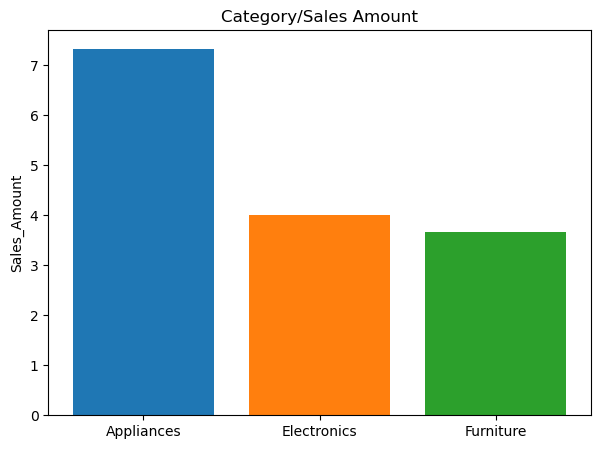

In [172]:
plt.figure(figsize = (7,5))
for group, data in new_df.groupby('category'):
    plt.bar(group, data['quantity_sold'].mean())
    plt.ylabel('Sales_Amount')
    plt.title('Category/Sales Amount')
plt.show()


### We can see that Appliances recorded the highest sales amount throughout the sales period

#### Use Case : Since there is a great demand for appliances in this location, more Appliances would be supplied to meet up with the demand

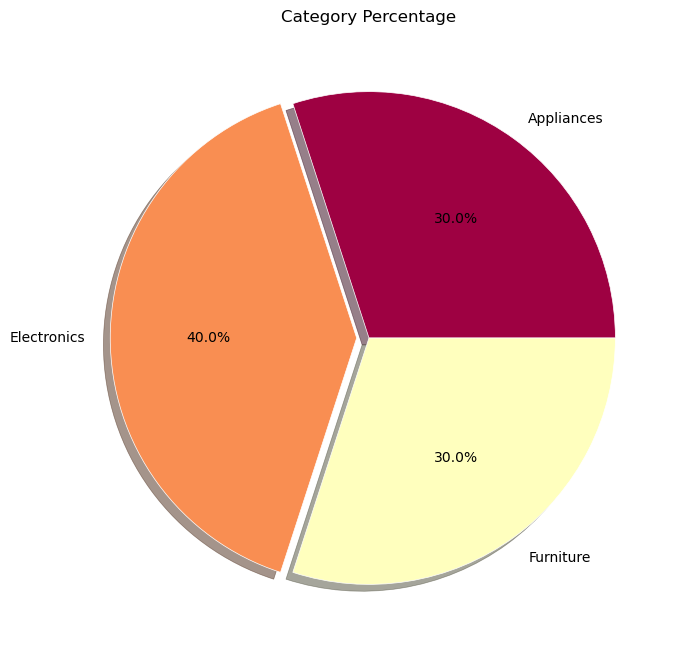

In [202]:
cmap = plt.get_cmap('Spectral')
clist = [cmap(i) for i in np.linspace(0, 1,5)]
plt.figure(figsize = (10, 8))
c_dict = dict()
my_explode = [0,0.05,0]
for c in set(new_df['category']):
    c_dict[c] = new_df[new_df['category']== c].product_name.count()
plt.pie(p_dict.values(), labels=p_dict.keys(), colors = clist, autopct='%1.1f%%', explode = my_explode, shadow = True, 
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'white'})
plt.title('Category Percentage')
plt.show()

#The concept of dictionary and looping was used here to group all products into their category

    

## From the pie chart above, we can see that 40% of the products are Electronics.

### Use case: Since Appliances performed more than Electornics, More Appliance should be supplied in the future

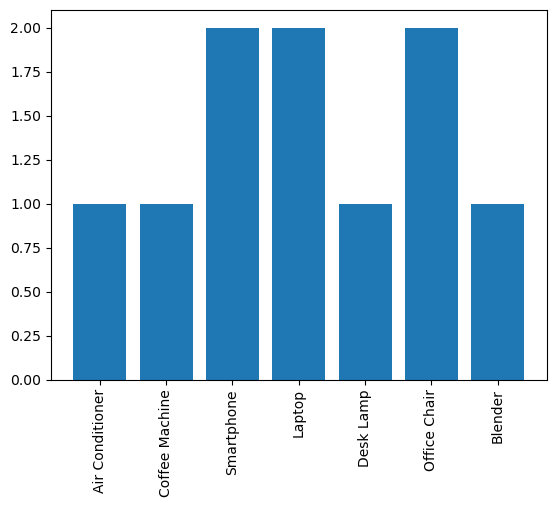

In [211]:
p_dict = dict()
for p in set(new_df['product_name']):
    p_dict[p] = new_df[new_df['product_name']== p].category.count()
plt.bar(p_dict.keys(), p_dict.values())
plt.xticks(rotation =90 )
plt.show()

#The concept of dictionary and looping was used here to group all products into their category to show the number of products sold
    

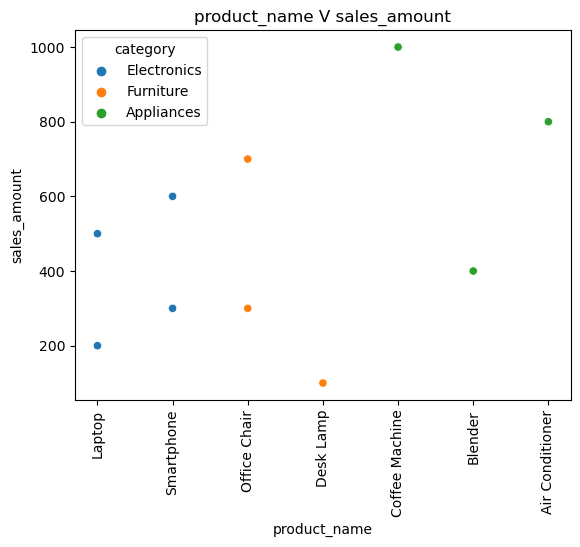

In [212]:
sns.scatterplot(x = 'product_name', y ='sales_amount', data = new_df, hue = 'category')
plt.xticks(rotation = 90)
plt.title('product_name V sales_amount')
plt.show()

#A scatterplot to show the relationship between product_name and sales_amount

### Coffee Machine which belongs to the Appliance category recorded the highest sale and more Electronics (Laptop and Smartphnes) were sold